In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
%matplotlib inline

In [2]:
n1=-10
n2=10
Np=250
delta=(n2-n1)/Np
n=np.arange(0,int(Np))*delta+n1
xn=np.random.rand(Np,1)
delta

0.08

In [3]:
def filtroPM(x,n,N):
    L=x.shape[0]
    xtemp=np.zeros([L+(N-1),1])*1.0
    xtemp[(N-1):]=x
    y=np.zeros(x.shape)
    for l in range(0,L):
        y[l]=xtemp[l:l+(N)].sum()/float(N)
    return y

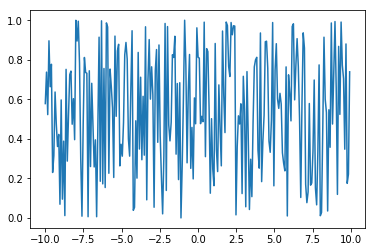

In [4]:
plt.plot(n,xn)

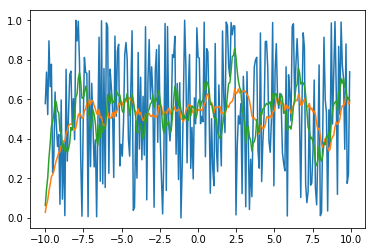

In [5]:
y=filtroPM(xn,n,20)
plt.plot(n,xn,n,y,n,filtroPM(xn,n,9))

In [6]:
def filtroPMPE(x,n,N,b):
    L=x.shape[0]
    xtemp=np.zeros([L+(N-1),1])*1.0
    xtemp[(N-1):]=x
    y=np.zeros(x.shape)
    a=(1.0-b)/(1-b**(N))
    i=np.arange(0,N)
    w=a*b**i
    for l in range(0,L):
        y[l]=(xtemp[l:l+(N)]*w.reshape([N,1])).sum()
    return y

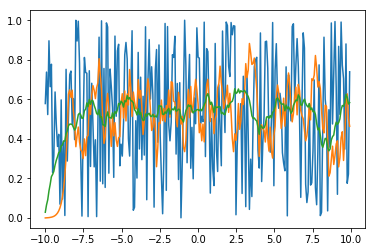

In [7]:
y1=filtroPMPE(xn,n,20,0.7)
plt.plot(n,xn,n,y1,n,y)